In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
 
import os
 
! mkdir ~/.kaggle
! cp /content/gdrive/My\ Drive/Projects/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
 
!git clone https://github.com/Kaggle/kaggle-api.git
!python /content/kaggle-api/setup.py install
 
!! kaggle datasets download -d 'unitednations/global-commodity-trade-statistics' -p /content
 
dir_name = "global-commodity-trade-statistics"
import zipfile
!mkdir dir_name
local_zip = '/content/{}.zip'.format(dir_name)
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/{}'.format(dir_name))
zip_ref.close()

Mounted at /content/gdrive
Cloning into 'kaggle-api'...
remote: Enumerating objects: 918, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 918 (delta 46), reused 16 (delta 7), pack-reused 842
Receiving objects: 100% (918/918), 454.63 KiB | 14.21 MiB/s, done.
Resolving deltas: 100% (659/659), done.
running install
running bdist_egg
running egg_info
creating kaggle.egg-info
writing kaggle.egg-info/PKG-INFO
writing dependency_links to kaggle.egg-info/dependency_links.txt
writing entry points to kaggle.egg-info/entry_points.txt
writing requirements to kaggle.egg-info/requires.txt
writing top-level names to kaggle.egg-info/top_level.txt
writing manifest file 'kaggle.egg-info/SOURCES.txt'
reading manifest file 'kaggle.egg-info/SOURCES.txt'
writing manifest file 'kaggle.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build
creating build/bdist.linux-x86_64
creating bui

In [ ]:
!pip install tensorflow-addons
!pip install keras_toolkit

     |████████████████████████████████| 706kB 13.6MB/s 


##Import dependency

In [ ]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

import tensorflow as tf
import tensorflow_addons as tfa
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import tensorflow.keras.optimizers
import tensorflow_hub as hub

from sklearn.model_selection import train_test_split

from functools import partial
import keras_toolkit as kt
from tensorflow.keras import layers
from tensorflow.keras.applications import resnet
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import Model

import sqlite3
from tensorflow.keras.applications import vgg16
from tensorflow.keras import backend as K

In [ ]:
strategy = kt.accelerator.auto_select(verbose=True)
BATCH_SIZE = strategy.num_replicas_in_sync * 16

Running on 1 replicas


In [ ]:
dataset = pd.read_csv("/content/global-commodity-trade-statistics/commodity_trade_statistics_data.csv")
# dataset = dataset.dropna(axis = 0, how ='any')
dataset

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals
...,...,...,...,...,...,...,...,...,...,...
8225866,Zimbabwe,2001,TOTAL,ALL COMMODITIES,Export,1206807424,NaN,No Quantity,NaN,all_commodities
8225867,Zimbabwe,2001,TOTAL,ALL COMMODITIES,Re-Export,15943977,NaN,No Quantity,NaN,all_commodities
8225868,Zimbabwe,2000,TOTAL,ALL COMMODITIES,Export,1924962432,NaN,No Quantity,NaN,all_commodities
8225869,Zimbabwe,1995,TOTAL,ALL COMMODITIES,Import,2658853376,NaN,No Quantity,NaN,all_commodities


In [ ]:
dataset = dataset.dropna(axis = 0, how ='any')
for index, name in enumerate(dataset.columns.tolist()):
  # category = set(dataset[name].tolist())
  print(name, set(dataset[name].tolist()), len(set(dataset[name].tolist())))
dataset

country_or_area {'Afghanistan', 'Bolivia (Plurinational State of)', 'Peru', 'Sri Lanka', 'Argentina', 'Singapore', 'Togo', 'Brunei Darussalam', 'Costa Rica', 'Cambodia', 'Fiji', 'USA', 'Iceland', 'Thailand', 'Lebanon', 'Russian Federation', 'India', 'Nicaragua', 'Rwanda', 'Sudan', 'Djibouti', 'Grenada', 'Turkmenistan', 'Kuwait', 'Mozambique', 'Uganda', 'Botswana', 'Other Asia, nes', 'Latvia', 'Saint Vincent and the Grenadines', 'Myanmar', 'Romania', 'Malawi', 'Bermuda', 'Jordan', 'Qatar', 'Nigeria', 'Timor-Leste', 'Georgia', 'South Africa', 'Turks and Caicos Isds', 'Guadeloupe', 'Anguilla', 'Iran', 'Panama', 'Colombia', 'Philippines', 'Saint Lucia', 'Mali', 'Malta', 'Neth. Antilles', 'Netherlands', 'Chad', 'Finland', 'Serbia', 'Namibia', 'Viet Nam', 'Trinidad and Tobago', 'Saint Kitts and Nevis', 'Tuvalu', 'Benin', 'Mauritius', 'Honduras', 'Guinea', 'Sierra Leone', 'Vanuatu', 'Gambia', 'Belgium-Luxembourg', 'Bhutan', 'China, Macao SAR', 'Papua New Guinea', 'Lithuania', 'Maldives', 'Sen

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



quantity_name {'Length in metres', 'Number of pairs', 'Thousands of items', 'Area in square metres', 'No Quantity', 'Electrical energy in thousands of kilowatt-hours', 'Weight in carats', 'Number of packages', 'Number of items', 'Volume in litres', 'Weight in kilograms', 'Volume in cubic meters'} 12


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals
...,...,...,...,...,...,...,...,...,...,...
8225123,Tunisia,1995,TOTAL,ALL COMMODITIES,Export,5474626110,0.0,No Quantity,0.0,all_commodities
8225460,United Kingdom,1998,TOTAL,ALL COMMODITIES,Import,311879512430,0.0,No Quantity,0.0,all_commodities
8225461,United Kingdom,1998,TOTAL,ALL COMMODITIES,Export,270295285433,0.0,No Quantity,0.0,all_commodities
8225462,United Kingdom,1997,TOTAL,ALL COMMODITIES,Import,305135405241,0.0,No Quantity,0.0,all_commodities


In [ ]:
dataset = dataset.loc[~dataset['flow'].isin(['Export', 'Re-Export', 'Re-Import'])]
dataset

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals
5,Albania,2016,10511,"Fowls, live domestic < 185 grams",Import,2671732,254652.0,Number of items,5629138.0,01_live_animals
7,Albania,2016,10519,"Poultry, live except domestic fowls, < 185 grams",Import,26485,2908.0,Number of items,64000.0,01_live_animals
...,...,...,...,...,...,...,...,...,...,...
8223555,Russian Federation,1996,TOTAL,ALL COMMODITIES,Import,61147000000,0.0,No Quantity,0.0,all_commodities
8223955,Saudi Arabia,1991,TOTAL,ALL COMMODITIES,Import,29073801235,0.0,No Quantity,0.0,all_commodities
8225122,Tunisia,1995,TOTAL,ALL COMMODITIES,Import,7903050467,0.0,No Quantity,0.0,all_commodities
8225460,United Kingdom,1998,TOTAL,ALL COMMODITIES,Import,311879512430,0.0,No Quantity,0.0,all_commodities


In [ ]:
dataset = dataset.loc[~dataset['quantity'].isin(['0.0'])]
dataset

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals
5,Albania,2016,10511,"Fowls, live domestic < 185 grams",Import,2671732,254652.0,Number of items,5629138.0,01_live_animals
7,Albania,2016,10519,"Poultry, live except domestic fowls, < 185 grams",Import,26485,2908.0,Number of items,64000.0,01_live_animals
...,...,...,...,...,...,...,...,...,...,...
8216107,Tunisia,1991,9999AA,Commodities not specified according to kind,Import,247703,24958.0,Weight in kilograms,24958.0,99_commodities_not_specified_according_to_kind
8216144,Turkey,1995,9999AA,Commodities not specified according to kind,Import,2290,24.0,Weight in kilograms,24.0,99_commodities_not_specified_according_to_kind
8216384,United Kingdom,1995,9999AA,Commodities not specified according to kind,Import,1746859136,133960032.0,Weight in kilograms,133960032.0,99_commodities_not_specified_according_to_kind
8216424,United Rep. of Tanzania,1999,9999AA,Commodities not specified according to kind,Import,13892,26855.0,Weight in kilograms,26855.0,99_commodities_not_specified_according_to_kind


In [ ]:
dataset = dataset.loc[~dataset['comm_code'].isin(['9999AA'])]
dataset

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals
5,Albania,2016,10511,"Fowls, live domestic < 185 grams",Import,2671732,254652.0,Number of items,5629138.0,01_live_animals
7,Albania,2016,10519,"Poultry, live except domestic fowls, < 185 grams",Import,26485,2908.0,Number of items,64000.0,01_live_animals
...,...,...,...,...,...,...,...,...,...,...
8209596,Zimbabwe,2006,970500,Collections and collectors pieces,Import,22231,1721.0,Weight in kilograms,1721.0,97_works_of_art_collectors_pieces_and_antiques
8209599,Zimbabwe,2006,970600,Antiques older than one hundred years,Import,22,250.0,Weight in kilograms,250.0,97_works_of_art_collectors_pieces_and_antiques
8209601,Zimbabwe,2005,970110,Paintings/drawings/pastels executed by hand,Import,4452,270.0,Number of items,1.0,97_works_of_art_collectors_pieces_and_antiques
8209602,Zimbabwe,2005,970190,"Collages, similar decorative plaques",Import,2624,467.0,Weight in kilograms,467.0,97_works_of_art_collectors_pieces_and_antiques


In [ ]:
dataset = dataset.loc[~dataset['commodity'].isin(['Commodities not specified according to kind'])]
dataset

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals
5,Albania,2016,10511,"Fowls, live domestic < 185 grams",Import,2671732,254652.0,Number of items,5629138.0,01_live_animals
7,Albania,2016,10519,"Poultry, live except domestic fowls, < 185 grams",Import,26485,2908.0,Number of items,64000.0,01_live_animals
...,...,...,...,...,...,...,...,...,...,...
8209596,Zimbabwe,2006,970500,Collections and collectors pieces,Import,22231,1721.0,Weight in kilograms,1721.0,97_works_of_art_collectors_pieces_and_antiques
8209599,Zimbabwe,2006,970600,Antiques older than one hundred years,Import,22,250.0,Weight in kilograms,250.0,97_works_of_art_collectors_pieces_and_antiques
8209601,Zimbabwe,2005,970110,Paintings/drawings/pastels executed by hand,Import,4452,270.0,Number of items,1.0,97_works_of_art_collectors_pieces_and_antiques
8209602,Zimbabwe,2005,970190,"Collages, similar decorative plaques",Import,2624,467.0,Weight in kilograms,467.0,97_works_of_art_collectors_pieces_and_antiques


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


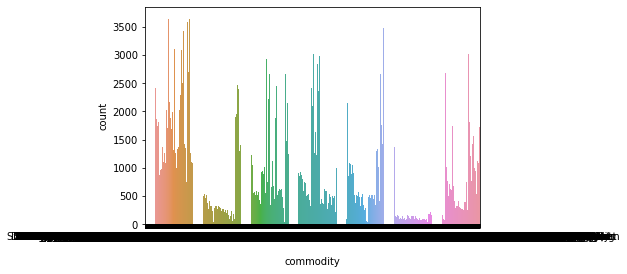

In [ ]:
import seaborn as sns

sns.countplot(x ='commodity', data = dataset)

plt.show()

In [ ]:
for index, name in enumerate(dataset.columns.tolist()):
  # category = set(dataset[name].tolist())
  print(name, set(dataset[name].tolist()), len(set(dataset[name].tolist())))

country_or_area {'Afghanistan', 'Bolivia (Plurinational State of)', 'Peru', 'Sri Lanka', 'Argentina', 'Singapore', 'Togo', 'Brunei Darussalam', 'Costa Rica', 'Cambodia', 'Fiji', 'USA', 'Iceland', 'Thailand', 'Lebanon', 'Russian Federation', 'India', 'Nicaragua', 'Rwanda', 'Sudan', 'Djibouti', 'Grenada', 'Kuwait', 'Mozambique', 'Uganda', 'Botswana', 'Other Asia, nes', 'Latvia', 'Saint Vincent and the Grenadines', 'Myanmar', 'Romania', 'Malawi', 'Bermuda', 'Jordan', 'Qatar', 'Nigeria', 'Timor-Leste', 'Georgia', 'South Africa', 'Turks and Caicos Isds', 'Guadeloupe', 'Anguilla', 'Iran', 'Panama', 'Colombia', 'Philippines', 'Saint Lucia', 'Mali', 'Malta', 'Neth. Antilles', 'Netherlands', 'Chad', 'Finland', 'Serbia', 'Namibia', 'Viet Nam', 'Trinidad and Tobago', 'Saint Kitts and Nevis', 'Tuvalu', 'Benin', 'Mauritius', 'Honduras', 'Guinea', 'Sierra Leone', 'Vanuatu', 'Gambia', 'Belgium-Luxembourg', 'Bhutan', 'China, Macao SAR', 'Papua New Guinea', 'Lithuania', 'Maldives', 'Senegal', 'Ukraine'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



quantity_name {'Length in metres', 'Number of pairs', 'Thousands of items', 'Area in square metres', 'No Quantity', 'Electrical energy in thousands of kilowatt-hours', 'Weight in carats', 'Number of packages', 'Number of items', 'Volume in litres', 'Weight in kilograms', 'Volume in cubic meters'} 12
quantity 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



category {'27_mineral_fuels_oils_distillation_products_etc', '71_pearls_precious_stones_metals_coins_etc', '26_ores_slag_and_ash', '28_inorganic_chemicals_precious_metal_compound_isotope', '34_soaps_lubricants_waxes_candles_modelling_pastes', '56_wadding_felt_nonwovens_yarns_twine_cordage_etc', '07_edible_vegetables_and_certain_roots_and_tubers', '31_fertilizers', '90_optical_photo_technical_medical_etc_apparatus', '72_iron_and_steel', '29_organic_chemicals', '88_aircraft_spacecraft_and_parts_thereof', '22_beverages_spirits_and_vinegar', '15_animal_vegetable_fats_and_oils_cleavage_products_et', '20_vegetable_fruit_nut_etc_food_preparations', '54_manmade_filaments', '02_meat_and_edible_meat_offal', '86_railway_tramway_locomotives_rolling_stock_equipmen', '12_oil_seed_oleagic_fruits_grain_seed_fruit_etc_ne', '23_residues_wastes_of_food_industry_animal_fodder', '33_essential_oils_perfumes_cosmetics_toileteries', '61_articles_of_apparel_accessories_knit_or_crochet', '35_albuminoids_modifie